# Uniform random number generator

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print np.random.random(10)

[ 0.2126924   0.67073664  0.95497087  0.94247992  0.24129898  0.27009875
  0.94137696  0.31397659  0.51091456  0.95950557]


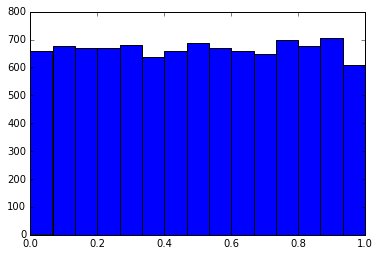

In [3]:
plt.hist(np.random.random(10000), bins=15);

# Gaussian random number generator

Gaussian probability density function:

$f(x \vert \mu, \sigma) = \frac{1}{\sqrt{2 \pi} \sigma} \exp{-\frac{(x-\mu)^2}{2 \sigma^2}}$, $x \in (-\infty, \infty)$

How to generate random number with gaussian distribution in <code>python</code>

In [4]:
from scipy.stats import norm

In [5]:
x = np.random.normal(size=10000)

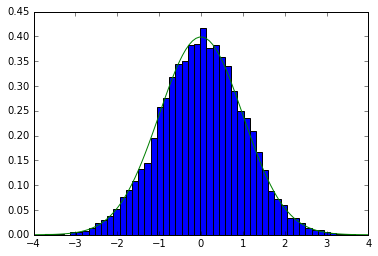

In [6]:
plt.hist(x, bins=50, normed=1) # normalize to 1

xp = np.linspace(-4,4,100)
plt.plot(xp, norm.pdf(xp)) # of course normalize (pdf)

### Box-Muller Transform

A method to generate Gaussian random number from uniform random number

$u_1, u_2 =$ uniform random number [0, 1]

We can generate gaussian random number ($z_1$ or $z_2$) with $\mu = 0$ and $\sigma = 1$

$z_1 = \sqrt{-2 \ln{u_1}} \cdot \cos{2 \pi u_2}$

$z_2 = \sqrt{-2 \ln{u_1}} \cdot \sin{2 \pi u_2}$

In [7]:
npoints = 10000
u1 = np.random.random(npoints)
u2 = np.random.random(npoints)

z1 = np.sqrt(-2.0*np.log(u1)) * np.cos(2*np.pi*u2) # we can generate 2 gaussian random number
z2 = np.sqrt(-2.0*np.log(u1)) * np.sin(2*np.pi*u2)

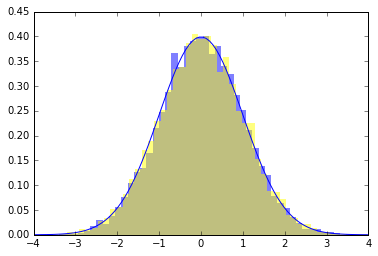

In [8]:
plt.hist(z1, bins=50, normed=1, alpha=0.5, linewidth=0, color='blue') # normalize to 1
plt.hist(z2, bins=50, normed=1, alpha=0.5, linewidth=0, color='yellow')

xp = np.linspace(-4,4,100)
plt.plot(xp, norm.pdf(xp)) # of course normalize (pdf)

To generate random number in other $\mu$ and $\sigma$ we can do

$z = \mu + \sigma \cdot z_0$

where $z_0$ is the result from Box-Muller

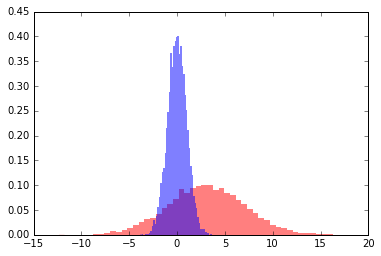

In [9]:
mu = 3.0
sigma = 4.0
z = mu + sigma*z1

plt.hist(z, bins=50, normed=1, alpha=0.5, linewidth=0, color='red')
plt.hist(z1, bins=50, normed=1, alpha=0.5, linewidth=0, color='blue');

nice!

### Polar form

The polar form of the Box-Muller transformation is both faster and more robust numerically. It is faster because it does the equivalent of the sine and cosine geometrically without a call to the trigonometric function library.

with

$s = u_1^2 + u_2^2$

$u_1, u_2 = $ uniform random number [-1, 1]

we can change the transformation,

$z_1 = u_1 \sqrt{\frac{-2 \ln{s}}{s}}$

$z_2 = u_2 \sqrt{\frac{-2 \ln{s}}{s}}$

In [10]:
import numpy as np
def random_normal():
    s = 1.0
    while ( s >= 1.0 ):
        u1 = 2.0 * np.random.random() - 1.0;
        u2 = 2.0 * np.random.random() - 1.0;
        s = u1*u1 + u2*u2

    w = np.sqrt(-2.0 * np.log(s)  / s)
    z1 = u1 * w
    # z2 = u2 * w
    return z1

In [11]:
N = 10000
z = [random_normal() for i in range(N)]

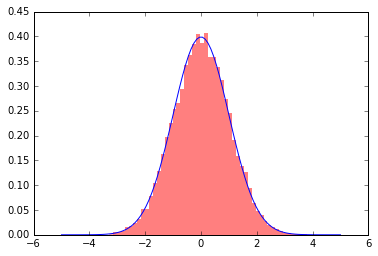

In [12]:
plt.hist(z, bins=50, normed=1, alpha=0.5, linewidth=0, color='red');

xp = np.linspace(-5,5,100)
plt.plot(xp, norm.pdf(xp));